In [1]:
#Dependencies
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read in csv pharma
df_Pharma = pd.read_csv("WVPharmData.csv")

In [2]:
#Check data types
df_Pharma.dtypes

BUYER_NAME           object
BUYER_CITY           object
BUYER_ZIP             int64
BUYER_COUNTY         object
DRUG_CODE             int64
DRUG_NAME            object
QUANTITY            float64
DOSAGE_UNIT         float64
TRANSACTION_DATE      int64
dtype: object

In [3]:
#Convert column year to str
df_Pharma["transaction year"]= df_Pharma["TRANSACTION_DATE"].astype(str)
df_Pharma["transaction year"] = df_Pharma["transaction year"].apply(lambda x: x[-4:])
df_Pharma.rename(columns = {"BUYER_COUNTY":"County"}, inplace = True)
df_Pharma["County"]=df_Pharma["County"].astype(str)

df_Pharma["County"] =df_Pharma["County"].str.lower() 
df_Pharma.drop(columns=['TRANSACTION_DATE'],inplace=True)
df_Pharma.head()

,BUYER_NAME,BUYER_CITY,BUYER_ZIP,County,DRUG_CODE,DRUG_NAME,QUANTITY,DOSAGE_UNIT,transaction year
0,TRIVILLIAN'S PHAR OF KANAWHA,CHARLESTON,25304,kanawha,9193,HYDROCODONE,2.0,1000.0,2006
1,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2011
2,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2012
3,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2012
4,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2012


In [4]:
#Check no of rows and columns along with data type
df_Pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879320 entries, 0 to 1879319
Data columns (total 9 columns):
BUYER_NAME          object
BUYER_CITY          object
BUYER_ZIP           int64
County              object
DRUG_CODE           int64
DRUG_NAME           object
QUANTITY            float64
DOSAGE_UNIT         float64
transaction year    object
dtypes: float64(2), int64(2), object(5)
memory usage: 129.0+ MB


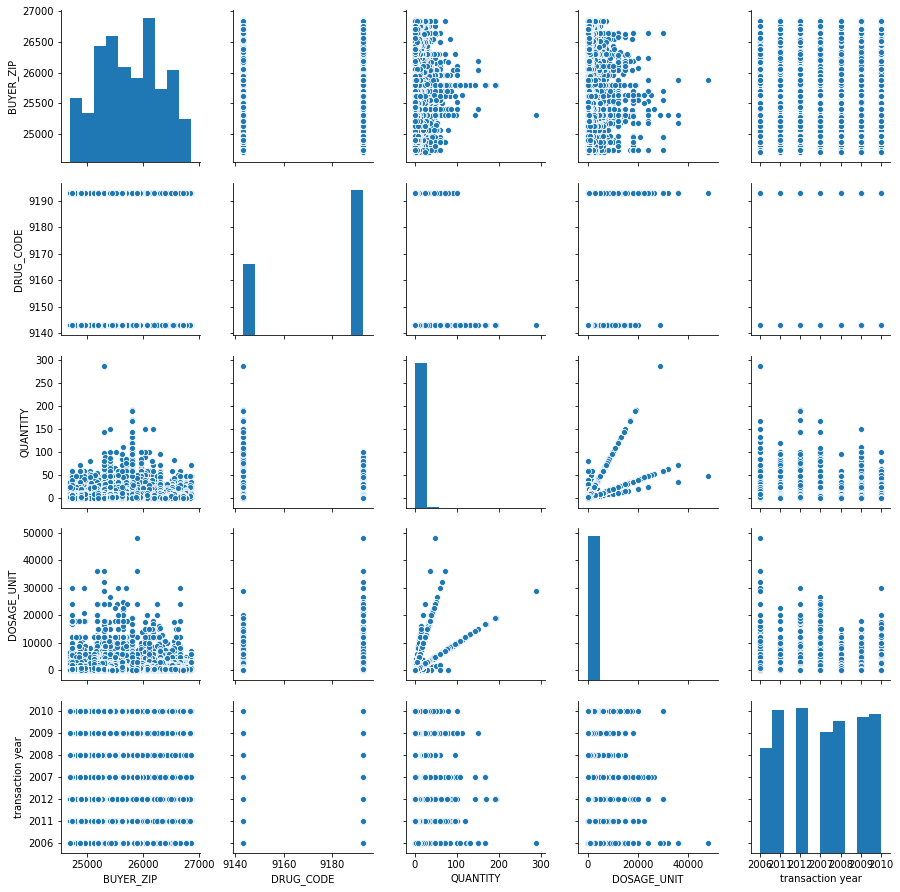

In [5]:
#To visualize if any linear correlation exists
sns.pairplot(df_Pharma)

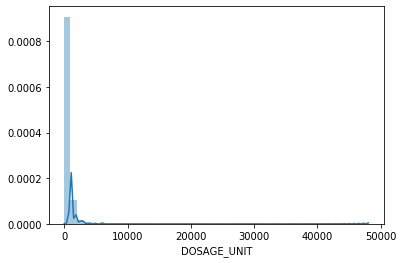

In [10]:
#Distribution of target column(quantity)
sns.distplot(df_Pharma["DOSAGE_UNIT"])

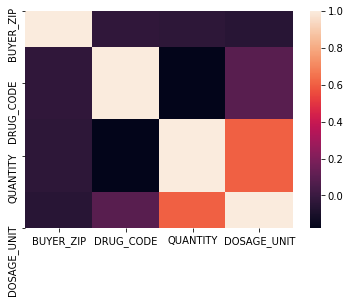

In [12]:
sns.heatmap(df_Pharma.corr(min_periods=10)) 

In [13]:
 df_Pharma.sort_values(by=['QUANTITY'])

,BUYER_NAME,BUYER_CITY,BUYER_ZIP,County,DRUG_CODE,DRUG_NAME,QUANTITY,DOSAGE_UNIT,transaction year
939659,KROGER PHARMACY,BLUEWELL,24701,mercer,9193,HYDROCODONE,1.0,500.0,2008
703530,REED'S,BERKELEY SPRINGS,25411,morgan,9193,HYDROCODONE,1.0,100.0,2009
703531,REED'S,BERKELEY SPRINGS,25411,morgan,9193,HYDROCODONE,1.0,500.0,2009
1378770,"CHARLIE'S PHARMACY OF MULLENS, LLC",MULLENS,25882,wyoming,9193,HYDROCODONE,1.0,100.0,2009
703533,REED'S,BERKELEY SPRINGS,25411,morgan,9143,OXYCODONE,1.0,100.0,2009
...,...,...,...,...,...,...,...,...,...
474324,"BYPASS PHARMACY, INC",BECKLEY,25801,raleigh,9143,OXYCODONE,170.0,17000.0,2012
1785102,"BYPASS PHARMACY, INC",BECKLEY,25801,raleigh,9143,OXYCODONE,190.0,19000.0,2012
123639,"BYPASS PHARMACY, INC",BECKLEY,25801,raleigh,9143,OXYCODONE,192.0,19200.0,2012
1062349,"BYPASS PHARMACY, INC",BECKLEY,25801,raleigh,9143,OXYCODONE,192.0,19200.0,2012


In [14]:
#To see unique values
df_Pharma.QUANTITY.unique()

array([  2.,   1.,   4.,   6.,  24.,   3.,  20.,   8.,   5.,  18.,  12.,
         9.,  10.,  15.,  13.,   7.,  11.,  14.,  60., 100.,  22.,  84.,
        17.,  23.,  19.,  31.,  21.,  16.,  28.,  44.,  58.,  33.,  48.,
        25.,  29.,  30.,  40.,  36.,  39.,  50.,  26.,  27.,  35., 144.,
        37.,  55.,  78.,  38.,  80.,  32.,  68.,  96.,  65.,  53.,  45.,
        46., 192.,  70.,  34.,  42., 150.,  54., 120.,  47.,  43., 168.,
        75.,  72.,  79.,  49.,  41.,  81.,  98., 170.,  99.,  64.,  90.,
        62.,  51., 122.,  57.,  66.,  67.,  56.,  59., 130.,  61., 112.,
       132.,  63.,  86.,  83.,  52.,  74.,  77.,  87., 108., 288., 190.])

In [15]:
#See how many unique value exist
len(df_Pharma.County.unique())

55

In [16]:
#read in death dataset to merge later
df_death= pd.read_table('input3.txt')
#drop the total rows 
df_death=df_death[df_death.Notes != 'Total']

df_death.head()

,Notes,County,County Code,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,"Barbour County, WV",54001.0,2006.0,2006.0,201.0,15922.0,1262.4
1,NaN,"Barbour County, WV",54001.0,2007.0,2007.0,164.0,16036.0,1022.7
2,NaN,"Barbour County, WV",54001.0,2008.0,2008.0,179.0,16241.0,1102.1
3,NaN,"Barbour County, WV",54001.0,2009.0,2009.0,188.0,16479.0,1140.8
4,NaN,"Barbour County, WV",54001.0,2010.0,2010.0,174.0,16589.0,1048.9


In [17]:
dfCounties= df_death[['County', 'Year', 'Population', 'Deaths']]
dfCounties.head()

,County,Year,Population,Deaths
0,"Barbour County, WV",2006.0,15922.0,201.0
1,"Barbour County, WV",2007.0,16036.0,164.0
2,"Barbour County, WV",2008.0,16241.0,179.0
3,"Barbour County, WV",2009.0,16479.0,188.0
4,"Barbour County, WV",2010.0,16589.0,174.0


In [18]:
dfCounties['county']=dfCounties['County'].astype(str)

C:\Users\vuntu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dfCounties['county_new'] = dfCounties['county'].str.split(' ').str[0]

C:\Users\vuntu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
dfCounties["countyF"] =dfCounties["county_new"].str.lower()
dfCounties.head()

C:\Users\vuntu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,County,Year,Population,Deaths,county,county_new,countyF
0,"Barbour County, WV",2006.0,15922.0,201.0,"Barbour County, WV",Barbour,barbour
1,"Barbour County, WV",2007.0,16036.0,164.0,"Barbour County, WV",Barbour,barbour
2,"Barbour County, WV",2008.0,16241.0,179.0,"Barbour County, WV",Barbour,barbour
3,"Barbour County, WV",2009.0,16479.0,188.0,"Barbour County, WV",Barbour,barbour
4,"Barbour County, WV",2010.0,16589.0,174.0,"Barbour County, WV",Barbour,barbour


In [22]:
dfCounties=dfCounties.dropna()

In [23]:
len(dfCounties)


385

In [24]:
dfCounties.head()

,County,Year,Population,Deaths,county,county_new,countyF
0,"Barbour County, WV",2006.0,15922.0,201.0,"Barbour County, WV",Barbour,barbour
1,"Barbour County, WV",2007.0,16036.0,164.0,"Barbour County, WV",Barbour,barbour
2,"Barbour County, WV",2008.0,16241.0,179.0,"Barbour County, WV",Barbour,barbour
3,"Barbour County, WV",2009.0,16479.0,188.0,"Barbour County, WV",Barbour,barbour
4,"Barbour County, WV",2010.0,16589.0,174.0,"Barbour County, WV",Barbour,barbour


In [25]:
dfCounties=dfCounties[['countyF', 'Year', 'Population', 'Deaths']]
#dfCounties.rename(columns = {"countyF":"County"}, inplace = True)
dfCounties.head()

,countyF,Year,Population,Deaths
0,barbour,2006.0,15922.0,201.0
1,barbour,2007.0,16036.0,164.0
2,barbour,2008.0,16241.0,179.0
3,barbour,2009.0,16479.0,188.0
4,barbour,2010.0,16589.0,174.0


In [26]:
dfCounties['New_Year']=dfCounties['Year'].astype(str)
dfCounties.head()
dfCounties.rename(columns = {"countyF":"County"}, inplace = True)
dfCounties.head()

,County,Year,Population,Deaths,New_Year
0,barbour,2006.0,15922.0,201.0,2006.0
1,barbour,2007.0,16036.0,164.0,2007.0
2,barbour,2008.0,16241.0,179.0,2008.0
3,barbour,2009.0,16479.0,188.0,2009.0
4,barbour,2010.0,16589.0,174.0,2010.0


In [27]:
dfCounties['Year_new'] = dfCounties['New_Year'].str.split('.').str[0]
dfCounties.head()

,County,Year,Population,Deaths,New_Year,Year_new
0,barbour,2006.0,15922.0,201.0,2006.0,2006
1,barbour,2007.0,16036.0,164.0,2007.0,2007
2,barbour,2008.0,16241.0,179.0,2008.0,2008
3,barbour,2009.0,16479.0,188.0,2009.0,2009
4,barbour,2010.0,16589.0,174.0,2010.0,2010


In [28]:
dfCounties=dfCounties[['County', 'Year_new', 'Population', 'Deaths']]
dfCounties.rename(columns = {"Year_new":"Year"}, inplace = True)
dfCounties.head()

,County,Year,Population,Deaths
0,barbour,2006,15922.0,201.0
1,barbour,2007,16036.0,164.0
2,barbour,2008,16241.0,179.0
3,barbour,2009,16479.0,188.0
4,barbour,2010,16589.0,174.0


In [29]:
#print(len(df_Pharma))
#df_Pharma.head()

In [30]:
merge_table = pd.merge(df_Pharma, dfCounties, how='left', left_on=['County','transaction year'], right_on = ['County','Year'])

merge_table.drop(columns=['transaction year'])

merge_table.head()

,BUYER_NAME,BUYER_CITY,BUYER_ZIP,County,DRUG_CODE,DRUG_NAME,QUANTITY,DOSAGE_UNIT,transaction year,Year,Population,Deaths
0,TRIVILLIAN'S PHAR OF KANAWHA,CHARLESTON,25304,kanawha,9193,HYDROCODONE,2.0,1000.0,2006,2006,192954.0,2403.0
1,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2011,2011,79127.0,986.0
2,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2012,2012,79021.0,1071.0
3,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2012,2012,79021.0,1071.0
4,COLONY DRUG,BECKLEY,25801,raleigh,9193,HYDROCODONE,1.0,500.0,2012,2012,79021.0,1071.0


In [31]:
#random sample to test run
randomFeatures = merge_table.sample(frac=.2, replace=True, random_state=1)

In [32]:
df1 = pd.get_dummies(randomFeatures['BUYER_NAME'])
df2 = pd.get_dummies(randomFeatures['BUYER_CITY'])
df3 = pd.get_dummies(randomFeatures['BUYER_ZIP'])
df4 = pd.get_dummies(randomFeatures['County'])
df5 = pd.get_dummies(randomFeatures['QUANTITY'])
df6 = pd.get_dummies(randomFeatures['DOSAGE_UNIT'])
df7 = pd.get_dummies(randomFeatures['Year'])
df8 = pd.get_dummies(randomFeatures['Population'])
df9 = pd.get_dummies(randomFeatures['Deaths'])

In [34]:
Merge= pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

In [35]:
Merge.head()

,A+ CARE PHARMACY,ACCESS HEALTH PHARM DANIELS,ACCESSHEALTH PHARMACY GLEN DANIEL,ACCESSHEALTH PHARMACY MABSCOTT,ACCESSHEALTH PHARMACY-FAYETTEVILLE,ADKINS PHARMACY INC,ADVANCE PHARMACY SERVICES,"AGAS, ULYSSES D MD","AKINS, JAMES ALAN MD",ALDERMAN'S PHARMACY,...,1145.0,1168.0,1255.0,2391.0,2403.0,2418.0,2443.0,2457.0,2473.0,2578.0
128037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
470924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1840200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
491263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df10 = randomFeatures["DRUG_NAME"]

In [37]:
df10.head()

128037     HYDROCODONE
491755     HYDROCODONE
470924     HYDROCODONE
1840200    HYDROCODONE
491263     HYDROCODONE
Name: DRUG_NAME, dtype: object

In [38]:
merged = pd.concat([Merge, df10], axis=1)

In [39]:
merged.head()

,A+ CARE PHARMACY,ACCESS HEALTH PHARM DANIELS,ACCESSHEALTH PHARMACY GLEN DANIEL,ACCESSHEALTH PHARMACY MABSCOTT,ACCESSHEALTH PHARMACY-FAYETTEVILLE,ADKINS PHARMACY INC,ADVANCE PHARMACY SERVICES,"AGAS, ULYSSES D MD","AKINS, JAMES ALAN MD",ALDERMAN'S PHARMACY,...,1168.0,1255.0,2391.0,2403.0,2418.0,2443.0,2457.0,2473.0,2578.0,DRUG_NAME
128037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HYDROCODONE
491755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,HYDROCODONE
470924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HYDROCODONE
1840200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,HYDROCODONE
491263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HYDROCODONE


In [40]:
feature_names = merged.columns

In [41]:
# Assign X (data) and y (target)
X = merged.drop("DRUG_NAME", axis=1)
y = merged["DRUG_NAME"]
print(X.shape, y.shape)


(375864, 1911) (375864,)


In [42]:
#Model selecton
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

In [ ]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["Hyrdocodone", "Oxycodone"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure